<a href="https://colab.research.google.com/github/aminfadaei116/Deep-Learning-Course/blob/master/CA2/Q1_PreData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import cv2
from scipy.io import loadmat
import numpy as np
import tqdm
import torch
from skimage.util import random_noise

In [ ]:
Data_joints = loadmat('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/joints.mat')["joints"][0:2,:,:]
width, height = 220, 220
dim = (width, height)
m = 2
number = 2000 * m
new_joints = np.zeros_like(Data_joints)
joint_tensor = torch.zeros((number, 2, 14))
normalized_joint_tensor = torch.zeros((number, 2, 14))
img_tensor = torch.zeros((number, 220, 220, 3))
gain2 = np.reshape([1/width, 1/height], (2, 1))
gain3 = np.reshape([-1/width, 1/height], (2, 1))
gain4 = np.array([[0, -1/height],[1/width, 0]])
gain5 = np.array([[0, +1/height],[-1/width, 0]])
gain6 = np.reshape([1/300, 1/300], (2, 1))

print(img_tensor.shape)
for i in range(2000):
    number = "{0:0=4d}".format(i + 1)
    img = cv2.imread("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/images/im" + number + ".jpg")
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    ######
    
    if i < 1000:
      img_tensor[m * i] = torch.FloatTensor(img_resized)
      img_tensor[m * i + 1] = torch.FloatTensor(cv2.rotate(img_resized, cv2.ROTATE_90_CLOCKWISE).copy())
    else:
      img_tensor[1000 +  i] = torch.FloatTensor(img_resized)
    #img_tensor[m * i + 2] = torch.FloatTensor(cv2.rotate(img_resized, cv2.ROTATE_90_COUNTERCLOCKWISE).copy())
    #img_tensor[m * i + 3] = torch.FloatTensor(cv2.resize(cv2.copyMakeBorder(img_resized ,40,40,40,40,cv2.BORDER_CONSTANT),dim,interpolation = cv2.INTER_AREA))
    #img_tensor[m * i + 4] = torch.FloatTensor(cv2.blur(img_resized,(10,10)))
    ###
    gain = np.reshape([220/img.shape[1], 220/img.shape[0]], (2, 1))
    center = np.reshape([width/2, height/2], (2, 1))
    temp = Data_joints[:,:,i]
    new_joint = np.multiply(temp, gain)
    new_joints[:,:,i] = new_joint
    joint_tensor[i]= torch.FloatTensor(new_joint)
    new_joint = np.subtract(new_joint, center)
    ##
    
    if i < 1000:
      normalized_joint_tensor[m * i] = torch.FloatTensor(np.multiply(new_joint, gain2))
      normalized_joint_tensor[m * i + 1] = torch.FloatTensor(np.matmul(gain4, new_joint))
    else:
      normalized_joint_tensor[1000 + i] = torch.FloatTensor(np.multiply(new_joint, gain2))
    #normalized_joint_tensor[m * i + 2] = torch.FloatTensor(np.matmul(gain5, new_joint))
    #normalized_joint_tensor[m * i + 3] = torch.FloatTensor(np.multiply(new_joint, gain6))
    #normalized_joint_tensor[m * i + 4] = torch.FloatTensor(np.multiply(new_joint, gain2))
    
    ##
    print(i * 100 /2000)
  
torch.save(normalized_joint_tensor, '/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/augmented_normalized_joint_tensor.pt')
#torch.save(joint_tensor, '/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/joint_tensor.pt')
torch.save(img_tensor, '/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/augmented_img_tensor.pt')


In [ ]:
x1 = normalized_joint_tensor[4][0]
y1 = normalized_joint_tensor[4][1]
y1 = np.multiply(y1, -1)
import matplotlib.pyplot as plt
plt.scatter(x1, y1)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()

In [ ]:
normalized_joint_dict = np.load('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/normalized_joint_dict_new.npy', allow_pickle='TRUE').item()
joint_dict = np.load('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/joint_dict_new.npy', allow_pickle='TRUE').item()
img_dict = np.load('/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/img_dict.npy', allow_pickle='TRUE').item()

In [ ]:
DataSet = [[], []]
for i in range(len(img_dict)):
  DataSet[0].append(torch.Tensor(img_dict[i+1]))
  DataSet[1].append(torch.Tensor(normalized_joint_dict[i+1]))

In [ ]:
# makes it easy to write user-friendly command-line interfaces
import argparse
# contains data structures for multi-dimensional tensors
# and mathematical operations over theme
import torch
# helps us in creating and training of the neural network.
import torch.nn as nn
# contains all the functions in the torch.nn library
import torch.nn.functional as F
# implements various optimization algorithms
import torch.optim as optim
# contains datasets with almost similar API
from torchvision import datasets
# contains common image transformations
from torchvision import transforms
# provides several methods to adjust the learning rate based on the number of epochs
from torch.optim.lr_scheduler import StepLR

In [ ]:
NUMBER_JOINST = 14
NUMBER_DIM = 2

In [ ]:
for i in range(2000):
    number = "{0:0=4d}".format(i + 1)
    img = cv2.imread("/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/images/im" + number + ".jpg")
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img_dict[i+1] = img_resized
    filename = "/content/drive/My Drive/Deep Learning Course Spring 99/DataSets/HW2-DataSet/reshaped_images/im" + number + ".jpg"
    #cv2.imwrite(filename, img_resized)
    gain = np.reshape([220/img.shape[1], 220/img.shape[0]], (2, 1))
    center = np.reshape([width/2, height/2], (2, 1))
    temp = Data_joints[:,:,i]
    new_joint = np.multiply(temp, gain)
    new_joints[:,:,i] = new_joint
    joint_dict[i+1]= new_joint
    new_joint = np.subtract(new_joint, center)
    new_joint = np.multiply(new_joint, gain2)
    normalized_joints[:,:,i] = new_joint
    normalized_joint_dict[i+1] = new_joint
    print(i * 100 /2000)
  

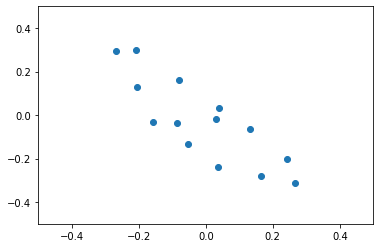

In [ ]:
import numpy as np
x1 = np.array([-0.2698, -0.2047, -0.0861,  0.0305, -0.0796, -0.2080, -0.1572,
          -0.0547,  0.0362,  0.2426,  0.1321,  0.0398,  0.1640,  0.2648])
y1 = np.array( [-0.2969, -0.1310,  0.0347,  0.0165, -0.1609, -0.2977,  0.0296,
           0.1345,  0.2404,  0.2011,  0.0637, -0.0342,  0.2792,  0.3114])
y1 = np.multiply(y1, -1)
import matplotlib.pyplot as plt
plt.scatter(x1, y1)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()

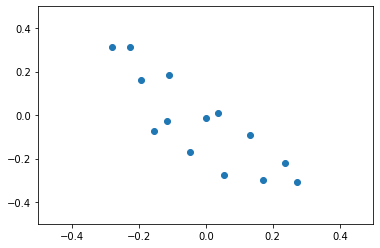

In [ ]:
[-0.0421, -0.0309, -0.0337,  0.0131,  0.0205,  0.0117, -0.0314,
          -0.0518, -0.0340,  0.0388,  0.0508,  0.0534,  0.0053,  0.0089]

import numpy as np
x = np.array([-0.2797, -0.1923, -0.1171,  0.0019, -0.1098, -0.2263, -0.1535,
          -0.0467,  0.0529,  0.2374,  0.1306,  0.0359,  0.1719,  0.2714])
y = np.array(  [-0.3133, -0.1592,  0.0277,  0.0133, -0.1839, -0.3133,  0.0729,
           0.1715,  0.2743,  0.2208,  0.0914, -0.0092,  0.2969,  0.3092])
y = np.multiply(y, -1)
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()